<a href="https://colab.research.google.com/github/andrewwhite5/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/SprintChallenge/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statistics
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
from google.colab import files
uploaded = files.upload()

In [145]:
col_headers = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

df = pd.read_csv('crx.data', header=None, names=col_headers, na_values='?')  # Add headers and change '?' to na values
print(df.shape)  # Should be 690 by 16
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [146]:
df['A1'].unique()  # Previously, this was how I checked to see which values were present (NaN was '?')

array(['b', 'a', nan], dtype=object)

In [147]:
print('A2 =', df['A2'].dtypes)  # Check to make sure the values are floats and ints
print('A3 =', df['A3'].dtypes)
print('A8 =', df['A8'].dtypes)
print('A11 =', df['A11'].dtypes)
print('A14 =', df['A14'].dtypes)
print('A15 =', df['A15'].dtypes)

A2 = float64
A3 = float64
A8 = float64
A11 = int64
A14 = float64
A15 = int64


In [148]:
df.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
df['A2'] = df['A2'].fillna(df['A2'].mean())
df['A14'] = df['A2'].fillna(df['A14'].mean())

In [0]:
df = df.dropna()

In [151]:
df.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
# df.replace({'-':0,'+':1},inplace=True)
# df.head()

In [153]:
df['A16'].unique()

array(['+', '-'], dtype=object)

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

##Visual Description

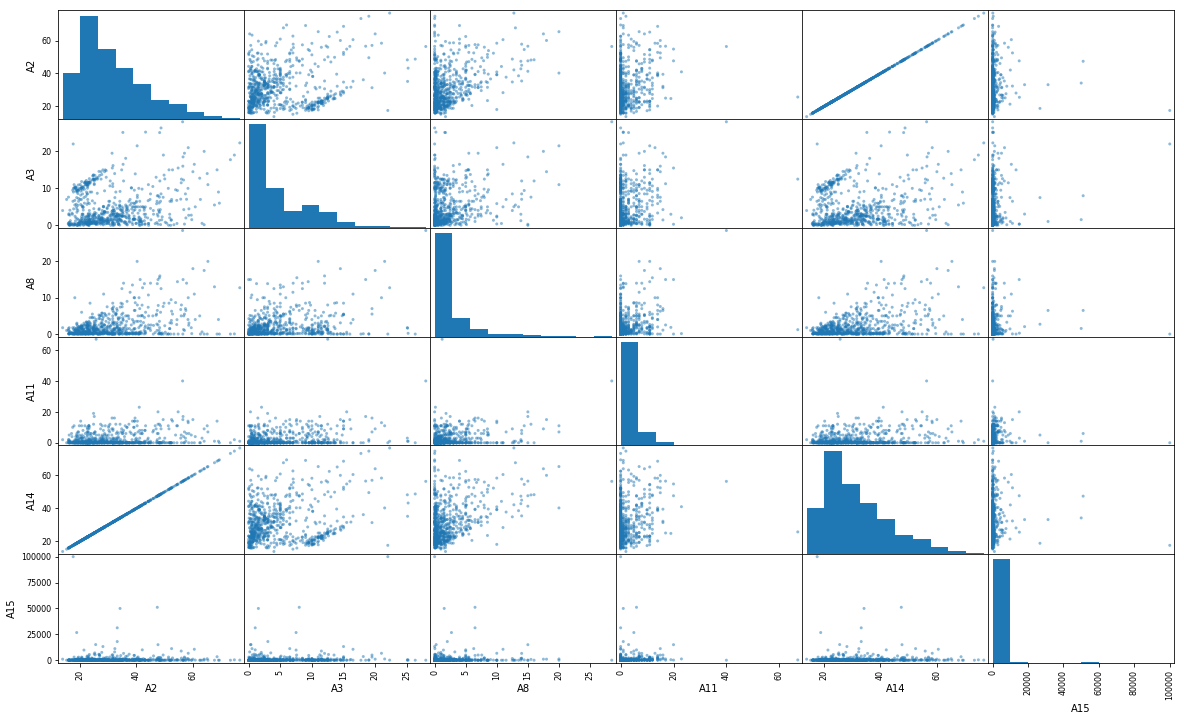

In [154]:
pd.plotting.scatter_matrix(df, figsize=(20,12));

In [155]:
plus = df[df['A16'].isin(['+'])]
minus = df[df['A16'].isin(['-'])]
plus.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,30.83,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,58.67,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,24.50,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,27.83,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,20.17,0,+


##Continuous Features

Continuous:
A2
A3
A8
A11
A14
A15

Categorical: 
A1
A4
A5
A6
A7
A9
A10
A12
A13

In [156]:
plus['A2'].describe()

count    300.000000
mean      33.749921
std       12.646152
min       13.750000
25%       23.250000
50%       31.040000
75%       41.352500
max       76.750000
Name: A2, dtype: float64

In [157]:
minus['A2'].describe()

count    371.000000
mean      29.625746
std       10.548350
min       15.170000
25%       22.040000
50%       27.420000
75%       34.710000
max       74.830000
Name: A2, dtype: float64

In [0]:
N = len(df)
N_plus = len(plus)
N_minus = len(minus)

###Exploration

In [183]:
tstat, pvalue = ttest_ind((plus['A3']), (minus['A3']))
print(tstat)
print(pvalue)

5.439901646485027
7.484203855791718e-08


In [184]:
tstat, pvalue = ttest_ind((plus['A8']), (minus['A8']))
print(tstat)
print(pvalue)

8.88248772912562
5.981017316904924e-18


In [185]:
tstat, pvalue = ttest_ind((plus['A14']), (minus['A14']))
print(tstat)
print(pvalue)

4.60547074718652
4.9268643141858815e-06


In [186]:
tstat, pvalue = ttest_ind((plus['A15']), (minus['A15']))
print(tstat)
print(pvalue)

4.6573224452641995
3.8652553184309034e-06


###A3 -- Not very different (still statistically significant)

In [168]:
# The confidence interval for A2
A2_std = np.std(df['A2'])
print('A2 St Dev:', A2_std)
print('Sample Size:', N)

standard_error = A2_std/np.sqrt(N)
print('Standard Error:', standard_error)

t = stats.t.ppf(0.975, N-1) # This is a 95% confidence interval

sample_mean = statistics.mean(df['A2'])

margin_of_error = t*standard_error
CI = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print('Sample Mean:', sample_mean)
print('Margin of Error:', margin_of_error)
print('Confidence Interval', CI)

A2 St Dev: 11.697118422043584
Sample Size: 671
Standard Error: 0.4515622482588918
Sample Mean: 31.469639423393957
Margin of Error: 0.8866474343995595
Confidence Interval (30.582991988994397, 32.35628685779351)


In [182]:
tstat, pvalue = ttest_ind((plus['A2']), (minus['A2']))
print('A2\n',tstat)
print('',pvalue)

A2
 4.60547074718652
 4.9268643141858815e-06


###A11 -- Extremely different

In [178]:
# The confidence interval for A11
A11_std = np.std(df['A11'])
print('A11 St Dev:', A11_std)
print('Sample Size:', N)

standard_error = A11_std/np.sqrt(N)
print('Standard Error:', standard_error)

sample_mean = statistics.mean(df['A11'])

margin_of_error = t*standard_error
CI = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print('Sample Mean:', sample_mean)
print('Margin of Error:', margin_of_error)
print('Confidence Interval', CI)

A11 St Dev: 4.91276826118111
Sample Size: 671
Standard Error: 0.18965531519396997
Sample Mean: 2.4619970193740683
Margin of Error: 0.3723902945504082
Confidence Interval (2.08960672482366, 2.8343873139244766)


In [181]:
tstat, pvalue = ttest_ind((plus['A11']), (minus['A11']))
print('A11\n',tstat)
print('',pvalue)

A11
 11.614745357569337
 1.5418580913707525e-28


##Categorical Features

Continuous:
A2
A3
A8
A11
A14
A15

Categorical: 
A1
A4
A5
A6
A7
A9
A10
A12
A13

In [0]:
# def crosstabulator(df):
#   for feat in df.columns:
#     if feat == 'A2' or 'A3' or 'A8' or 'A11' or 'A14' or 'A15' or 'A16':
#       next
#     else:
#       print(pd.crosstab(df['A16'], df[feat], margins=True))
      
# crosstabulator(df)

###A1 -- Not significant

In [228]:
pd.crosstab(df['A16'], df['A1'], margins=True)

A1,a,b,All
A16,,,
+,96,204,300
-,112,259,371
All,208,463,671


In [229]:
observed_A1 = pd.crosstab(df['A16'], df['A1']).values
print(observed.shape)
observed_A1

(2, 2)


array([[ 96, 204],
       [112, 259]])

In [230]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_A1)
print(chi_squared, p_value, dof, expected)

0.1767909638113253 0.6741456644073701 1 [[ 92.99552906 207.00447094]
 [115.00447094 255.99552906]]


###A9 -- Extremely significant

In [234]:
pd.crosstab(df['A16'], df['A9'], margins=True)

A9,f,t,All
A16,,,
+,18,282,300
-,295,76,371
All,313,358,671


In [235]:
observed_A9 = pd.crosstab(df['A16'], df['A9']).values
print(observed.shape)
observed_A9

(2, 2)


array([[ 18, 282],
       [295,  76]])

In [236]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_A9)
print(chi_squared, p_value, dof, expected)

357.24924571405785 1.1183019749553839e-79 1 [[139.94038748 160.05961252]
 [173.05961252 197.94038748]]


###The rest are supplemental

###A4

In [192]:
pd.crosstab(df['A16'], df['A4'], margins=True)

A4,l,u,y,All
A16,,,,
+,2,253,45,300
-,0,257,114,371
All,2,510,159,671


In [207]:
observed = pd.crosstab(df['A16'], df['A4']).values
print(observed.shape)
observed

(2, 3)


array([[  2, 253,  45],
       [  0, 257, 114]])

In [208]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

24.73908550813229 4.245959411054058e-06 2 [[  0.89418778 228.01788376  71.08792846]
 [  1.10581222 281.98211624  87.91207154]]


###A5

In [193]:
pd.crosstab(df['A16'], df['A5'], margins=True)

A5,g,gg,p,All
A16,,,,
+,253,2,45,300
-,257,0,114,371
All,510,2,159,671


In [209]:
observed = pd.crosstab(df['A16'], df['A5']).values
print(observed.shape)
observed

(2, 3)


array([[253,   2,  45],
       [257,   0, 114]])

In [210]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

24.73908550813229 4.245959411054058e-06 2 [[228.01788376   0.89418778  71.08792846]
 [281.98211624   1.10581222  87.91207154]]


###A6

In [194]:
pd.crosstab(df['A16'], df['A6'], margins=True)

A6,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x,All
A16,,,,,,,,,,,,,,,
+,19,61,29,7,14,7,14,3,13,16,50,2,33,32,300
-,34,74,11,23,10,46,44,7,37,22,26,1,30,6,371
All,53,135,40,30,24,53,58,10,50,38,76,3,63,38,671


In [211]:
observed = pd.crosstab(df['A16'], df['A6']).values
print(observed.shape)
observed

(2, 14)


array([[19, 61, 29,  7, 14,  7, 14,  3, 13, 16, 50,  2, 33, 32],
       [34, 74, 11, 23, 10, 46, 44,  7, 37, 22, 26,  1, 30,  6]])

In [212]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

100.53744166774614 1.3052053320128543e-15 13 [[23.69597615 60.35767511 17.88375559 13.41281669 10.73025335 23.69597615
  25.9314456   4.4709389  22.35469449 16.98956781 33.97913562  1.34128167
  28.16691505 16.98956781]
 [29.30402385 74.64232489 22.11624441 16.58718331 13.26974665 29.30402385
  32.0685544   5.5290611  27.64530551 21.01043219 42.02086438  1.65871833
  34.83308495 21.01043219]]


###A7

In [195]:
pd.crosstab(df['A16'], df['A7'], margins=True)

A7,bb,dd,ff,h,j,n,o,v,z,All
A16,,,,,,,,,,
+,24,2,8,87,3,2,1,167,6,300
-,33,4,49,50,5,2,1,225,2,371
All,57,6,57,137,8,4,2,392,8,671


In [213]:
observed = pd.crosstab(df['A16'], df['A7']).values
print(observed.shape)
observed

(2, 9)


array([[ 24,   2,   8,  87,   3,   2,   1, 167,   6],
       [ 33,   4,  49,  50,   5,   2,   1, 225,   2]])

In [214]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

45.651740293789906 2.768207109177882e-07 8 [[ 25.48435171   2.68256334  25.48435171  61.25186289   3.57675112
    1.78837556   0.89418778 175.26080477   3.57675112]
 [ 31.51564829   3.31743666  31.51564829  75.74813711   4.42324888
    2.21162444   1.10581222 216.73919523   4.42324888]]


###A10

In [197]:
pd.crosstab(df['A16'], df['A10'], margins=True)

A10,f,t,All
A16,,,
+,94,206,300
-,285,86,371
All,379,292,671


In [218]:
observed = pd.crosstab(df['A16'], df['A10']).values
print(observed.shape)
observed

(2, 2)


array([[ 94, 206],
       [285,  86]])

In [219]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

137.77715144095052 8.153165456905943e-32 1 [[169.4485842 130.5514158]
 [209.5514158 161.4485842]]


###A12

In [198]:
pd.crosstab(df['A16'], df['A12'], margins=True)

A12,f,t,All
A16,,,
+,154,146,300
-,206,165,371
All,360,311,671


In [220]:
observed = pd.crosstab(df['A16'], df['A12']).values
print(observed.shape)
observed

(2, 2)


array([[154, 146],
       [206, 165]])

In [221]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

1.0098120572639042 0.3149478684803797 1 [[160.9538003 139.0461997]
 [199.0461997 171.9538003]]


###A13

In [199]:
pd.crosstab(df['A16'], df['A13'], margins=True)

A13,g,p,s,All
A16,,,,
+,284,1,15,300
-,330,1,40,371
All,614,2,55,671


In [222]:
observed = pd.crosstab(df['A16'], df['A13']).values
print(observed.shape)
observed

(2, 3)


array([[284,   1,  15],
       [330,   1,  40]])

In [223]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

7.379849235127643 0.024973884563579983 2 [[274.51564829   0.89418778  24.59016393]
 [339.48435171   1.10581222  30.40983607]]


In [0]:
# for feat in df.columns:
  
#   if feat == 'A16':
#     next
#   else:
#     plus = df[df['A16'] == '1'][feat]
#     minus = df[df['A16'] == '0'][feat]
    
#     mu, sigma = np.mean(df[feat]), np.std(df[feat])
#     mu_plus, sigma_plus = np.mean(plus), np.std(plus)
#     mu_minus, sigma_minus = np.mean(minus), np.std(minus)

#     ci = stats.norm.interval(0.95, loc=mu, scale=sigma/np.sqrt(len(df[feat])))
#     ci_plus = stats.norm.interval(0.95, loc=mu_plus, scale=sigma_plus/np.sqrt(len(plus)))
#     ci_minus = stats.norm.interval(0.95, loc=mu_minus, scale=sigma_minus/np.sqrt(len(minus)))

# print(ci)
# print(ci_plus)
# print(ci_minus)

In [0]:
# y1 = [mu, mu_r, mu_d]
#     yer1 = [ci[1]-mu,ci_d[1]-mu_d, ci_r[1]-mu_r]
#     xlength = np.arange(len(y1))
     
#     color=['g','r','b']
#     fig, ax = plt.subplots(figsize=(2,4));
#     plt.title(feat)
#     plt.ylabel("Percentage voted Yes")
#     for i in xlength:
#       plt.errorbar(xlength[i], y1[i], yerr=yer1[i],ls='none',marker='o',capsize=7,c=color[i])
      
#     ax.set_xticks(xlength)
#     ax.set_xticklabels(['Total','Rep','Dem'])
#     ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
#     plt.ylim(0, 1)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

###Analysis

It's clear that whatever the A9 and A11 features represent highly impact whether or not a person was accepted for a credit card.

**A11 T-test**

In [227]:
tstat, pvalue = ttest_ind((plus['A11']), (minus['A11']))
print('A11\n',tstat)
print('',pvalue)

A11
 11.614745357569337
 1.5418580913707525e-28


**A9 Chi-squared test**

In [238]:
pd.crosstab(df['A16'], df['A9'], margins=True)

A9,f,t,All
A16,,,
+,18,282,300
-,295,76,371
All,313,358,671


In [237]:
observed_A9 = pd.crosstab(df['A16'], df['A9']).values
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_A9)
print(chi_squared, p_value, dof, expected)

357.24924571405785 1.1183019749553839e-79 1 [[139.94038748 160.05961252]
 [173.05961252 197.94038748]]
